1. Import the Necessary Libraries

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

2. Import the Dataset

In [497]:
data = pd.read_csv(r'C:\Users\User\Downloads\archive (2).zip')

In [498]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

3. Checking the Dataset

In [499]:
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [500]:
data.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [501]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data.Outcome == 0]
data_minority = data[data.Outcome == 1]

# Upsample minority class
n_minority = len(data_minority)
n_majority = len(data_majority)
desired_minority_ratio = 0.5103 # desired ratio of minority class
desired_minority_size = int(n_majority * desired_minority_ratio / (1 - desired_minority_ratio))
data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=desired_minority_size,
                                   random_state=42)

# Combine majority class with upsampled minority class
data_balanced2 = pd.concat([data_majority, data_minority_upsampled])

# Check class distribution
print(data_balanced2.Outcome.value_counts(normalize=True))


1    0.510284
0    0.489716
Name: Outcome, dtype: float64


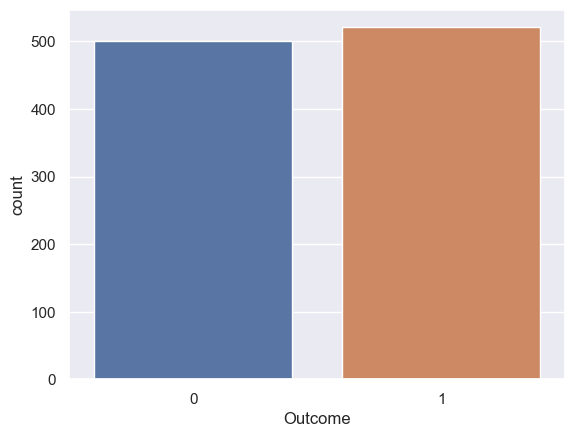

In [502]:
sns.countplot(data=data_balanced2, x='Outcome')
plt.show()

In [471]:
data_balanced2.shape
print(f'{data.shape[0]} rows,\n {data.shape[1]} columns')

768 rows,
 9 columns


In [472]:
data_balanced2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [473]:
# More information on the Dataset
data_balanced2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1 to 480
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1021 non-null   int64  
 1   Glucose                   1021 non-null   int64  
 2   BloodPressure             1021 non-null   int64  
 3   SkinThickness             1021 non-null   int64  
 4   Insulin                   1021 non-null   int64  
 5   BMI                       1021 non-null   float64
 6   DiabetesPedigreeFunction  1021 non-null   float64
 7   Age                       1021 non-null   int64  
 8   Outcome                   1021 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 79.8 KB


The Dataset contains information on 1021 individuals and has 9 columns.
The number of non-null values is 1021 for each column.
The datatypes are either int64 or float64
The outcome feature represents the target variable, with a value of 0 indicating that the individual does not have diabetes and a value of 1 indicating that the individual has diabetes.

In [474]:
# Central Tendencies
central_tendency = data_balanced2.describe()
central_tendency

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1021.000000  1021.000000    1021.000000    1021.000000  1021.000000   
mean      4.213516   124.665034      70.219393      20.987267    86.231146   
std       3.561154    31.422882      19.186772      16.085093   123.041287   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000   103.000000      64.000000       0.000000     0.000000   
50%       3.000000   122.000000      72.000000      24.000000    23.000000   
75%       7.000000   145.000000      80.000000      33.000000   140.000000   
max      17.000000   199.000000     122.000000      63.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  1021.000000               1021.000000  1021.000000  1021.000000  
mean     32.532811                  0.478422    34.368266     0.510284  
std       7.574914                  0.330609    11.623148     0.500139  
min       0.000000                  0.078000    21.000000     0.000000  
25%      28.000000                  0.247000    25.000000     0.000000  
50%      32.400000                  0.371000    31.000000     1.000000  
75%      36.800000                  0.645000    42.000000     1.000000  
max      67.100000                  2.420000    81.000000     1.000000

4. Clean and explore the Dataset

In [475]:
# Check for Duplicates
data_balanced2.duplicated()

1      False
3      False
5      False
7      False
10     False
       ...  
425     True
235     True
356     True
515     True
480     True
Length: 1021, dtype: bool

In [476]:
data_balanced2.duplicated().sum()

296

In [478]:
data_balanced2=data_balanced.drop_duplicates()

In [479]:
data_balanced2.duplicated().sum()

0

In [480]:
# Check for missing values
data_balanced2.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
1          False    False          False          False    False  False   
3          False    False          False          False    False  False   
5          False    False          False          False    False  False   
7          False    False          False          False    False  False   
10         False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
236        False    False          False          False    False  False   
391        False    False          False          False    False  False   
214        False    False          False          False    False  False   
406        False    False          False          False    False  False   
13         False    False          False          False    False  False   

       DPF    Age  Outcome  
1    False  False    False  
3    False  False    False  
5    False  False    False  
7    False  False    False  
10   False  False    False  
..     ...    ...      ...  
236  False  False    False  
391  False  False    False  
214  False  False    False  
406  False  False    False  
13   False  False    False  

[725 rows x 9 columns]

In [481]:
data_balanced2.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

### Dataset has no missing values

In [482]:
data_balanced2.isin([0]).sum()

Pregnancies      100
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
DPF                0
Age                0
Outcome          500
dtype: int64

In [521]:
data_balanced2['Glucose']=data_balanced2['Glucose'].replace(0,data_balanced2['Glucose'].mean())
data_balanced2['BloodPressure']=data_balanced2['BloodPressure'].replace(0,data_balanced2['BloodPressure'].mean())
data_balanced2['SkinThickness']=data_balanced2['SkinThickness'].replace(0,data_balanced2['SkinThickness'].median())
data_balanced2['Insulin']=data_balanced2['Insulin'].replace(0,data_balanced2['Insulin'].median())
data_balanced2['BMI']=data_balanced2['BMI'].replace(0,data_balanced2['BMI'].median())

In [522]:
data_balanced2.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            1     85.0      66.000000             29       23  26.6  0.351   
1            1     89.0      66.000000             23       94  28.1  0.167   
2            5    116.0      74.000000             24       23  25.6  0.201   
3           10    115.0      70.219393             24       23  35.3  0.134   
4            4    110.0      92.000000             24       23  37.6  0.191   

   Age  Outcome  
0   31        0  
1   21        0  
2   30        0  
3   29        0  
4   30        0

In [508]:
data_balanced2 = data_balanced2.rename(columns={'DiabetesPedigreeFunction': 'DPF'})


In [486]:
data_balanced2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
1              1     85.0      66.000000             29       23  26.6  0.351   
3              1     89.0      66.000000             23       94  28.1  0.167   
5              5    116.0      74.000000             23       23  25.6  0.201   
7             10    115.0      69.102069             23       23  35.3  0.134   
10             4    110.0      92.000000             23       23  37.6  0.191   
..           ...      ...            ...            ...      ...   ...    ...   
236            7    181.0      84.000000             21      192  35.9  0.586   
391            5    166.0      76.000000             23       23  45.7  0.340   
214            9    112.0      82.000000             32      175  34.2  0.260   
406            4    115.0      72.000000             23       23  28.9  0.376   
13             1    189.0      60.000000             23      846  30.1  0.398   

     Age  Outcome  
1     31        0  
3     21        0  
5     30        0  
7     29        0  
10    30        0  
..   ...      ...  
236   51        1  
391   27        1  
214   36        1  
406   46        1  
13    59        1  

[725 rows x 9 columns]

In [523]:
data_balanced2.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1021.000000  1021.000000    1021.000000    1021.000000  1021.000000   
mean      4.213516   125.397640      73.245498      28.203722    97.584721   
std       3.561154    29.923911      12.094062       8.761414   115.375618   
min       0.000000    44.000000      24.000000       7.000000    14.000000   
25%       1.000000   103.000000      66.000000      24.000000    23.000000   
50%       3.000000   123.000000      72.000000      24.000000    23.000000   
75%       7.000000   145.000000      80.000000      33.000000   140.000000   
max      17.000000   199.000000     122.000000      63.000000   846.000000   

               BMI          DPF          Age      Outcome  
count  1021.000000  1021.000000  1021.000000  1021.000000  
mean     32.881881     0.478422    34.368266     0.510284  
std       6.770790     0.330609    11.623148     0.500139  
min      18.200000     0.078000    21.000000     0.000000  
25%      28.200000     0.247000    25.000000     0.000000  
50%      32.400000     0.371000    31.000000     1.000000  
75%      36.800000     0.645000    42.000000     1.000000  
max      67.100000     2.420000    81.000000     1.000000

In [488]:
data_balanced2.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
1             1     85.0      66.000000             29       23  26.6  0.351   
3             1     89.0      66.000000             23       94  28.1  0.167   
5             5    116.0      74.000000             23       23  25.6  0.201   
7            10    115.0      69.102069             23       23  35.3  0.134   
10            4    110.0      92.000000             23       23  37.6  0.191   
12           10    139.0      80.000000             23       23  27.1  1.441   
18            1    103.0      30.000000             38       83  43.3  0.183   
20            3    126.0      88.000000             41      235  39.3  0.704   
21            8     99.0      84.000000             23       23  35.4  0.388   
27            1     97.0      66.000000             15      140  23.2  0.487   

    Age  Outcome  
1    31        0  
3    21        0  
5    30        0  
7    29        0  
10   30        0  
12   57        0  
18   33        0  
20   27        0  
21   50        0  
27   22        0

In [490]:
data_balanced2.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
236            7    181.0           84.0             21      192  35.9  0.586   
391            5    166.0           76.0             23       23  45.7  0.340   
214            9    112.0           82.0             32      175  34.2  0.260   
406            4    115.0           72.0             23       23  28.9  0.376   
13             1    189.0           60.0             23      846  30.1  0.398   

     Age  Outcome  
236   51        1  
391   27        1  
214   36        1  
406   46        1  
13    59        1

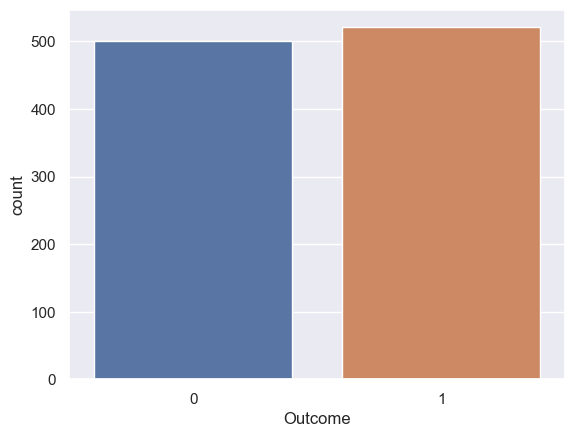

In [503]:
sns.countplot(data=data_balanced2, x='Outcome')
plt.show()

In [491]:
import pandas as pd
from scipy.stats import ttest_ind

# Split the dataset into two groups based on Outcome (0: no diabetes, 1: diabetes)
no_diabetes = data_balanced2[data_balanced2['Outcome'] == 0]
diabetes = data_balanced2[data_balanced2['Outcome'] == 1]

# Perform two-sample t-test on Age and BMI
age_pvalue = ttest_ind(no_diabetes['Age'], diabetes['Age']).pvalue
bmi_pvalue = ttest_ind(no_diabetes['BMI'], diabetes['BMI']).pvalue

# Print the p-values
print('Age p-value:', age_pvalue)
print('BMI p-value:', bmi_pvalue)


Age p-value: 1.7514659848450018e-11
BMI p-value: 6.924173626198047e-15


In [492]:
import scipy.stats as stats
# Group the data by Outcome 
group0 = data_balanced2[data_balanced2['Outcome'] == 0]
group1 = data_balanced2[data_balanced2['Outcome'] == 1]

# store the results
results = pd.DataFrame(columns=['column', 't_statistic', 'p_value'])

# Looping
for column in data.columns[:-1]:
    t_statistic, p_value = stats.ttest_ind(group0[column], group1[column], equal_var=False)
    results = results.append({'column': column, 't_statistic': t_statistic, 'p_value': p_value}, ignore_index=True)

# results
print(results)


KeyError: 'DiabetesPedigreeFunction'

#### Boxplot helps in analyzing the distribution and identifying any outliers

In [451]:
# Common exploratory data analysis techniques used to understand the distribution and relationship between variables in the dataset.

In [459]:


# Count the number of outcomes
counts = data_balanced['Outcome'].value_counts()

# Calculate the proportion of outcomes
proportions = counts / sum(counts)

# Set the target proportions
target_proportions = pd.Series([0.5003, 0.4997], index=[0, 1])

# Calculate the number of samples to keep from each outcome
keep_counts = np.round(target_proportions * len(data)).astype(int)

# Create a list of dataframes for each outcome with the desired number of samples
dfs = []
for outcome in [0, 1]:
    df_outcome = data[data['Outcome'] == outcome]
    dfs.append(df_outcome.sample(n=keep_counts[outcome], replace=True, random_state=42))

# Concatenate the dataframes and shuffle the rows
balanced_data = pd.concat(dfs).sample(frac=1, random_state=42)

# Check the proportions of the balanced dataset
print(balanced_data['Outcome'].value_counts(normalize=True))


1    0.5
0    0.5
Name: Outcome, dtype: float64


In [460]:

data_balanced.to_csv('modified_dataset3.csv', index=False)

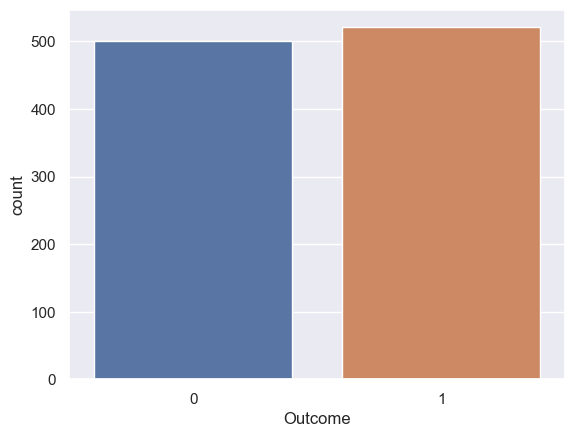

In [504]:


sns.countplot(x='Outcome', data=data_balanced2)
plt.show()

In [494]:
data_balanced2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
1              1     85.0      66.000000             29       23  26.6  0.351   
3              1     89.0      66.000000             23       94  28.1  0.167   
5              5    116.0      74.000000             23       23  25.6  0.201   
7             10    115.0      69.102069             23       23  35.3  0.134   
10             4    110.0      92.000000             23       23  37.6  0.191   
..           ...      ...            ...            ...      ...   ...    ...   
236            7    181.0      84.000000             21      192  35.9  0.586   
391            5    166.0      76.000000             23       23  45.7  0.340   
214            9    112.0      82.000000             32      175  34.2  0.260   
406            4    115.0      72.000000             23       23  28.9  0.376   
13             1    189.0      60.000000             23      846  30.1  0.398   

     Age  Outcome  
1     31        0  
3     21        0  
5     30        0  
7     29        0  
10    30        0  
..   ...      ...  
236   51        1  
391   27        1  
214   36        1  
406   46        1  
13    59        1  

[725 rows x 9 columns]

In [505]:
data_balanced2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
425            4      184             78             39      277  37.0   
235            4      171             72              0        0  43.6   
356            1      125             50             40      167  33.3   
515            3      163             70             18      105  31.6   
480            3      158             70             30      328  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
..                        ...  ...      ...  
425                     0.264   31        1  
235                     0.479   26        1  
356                     0.962   28        1  
515                     0.268   28        1  
480                     0.344   35        1  

[1021 rows x 9 columns]

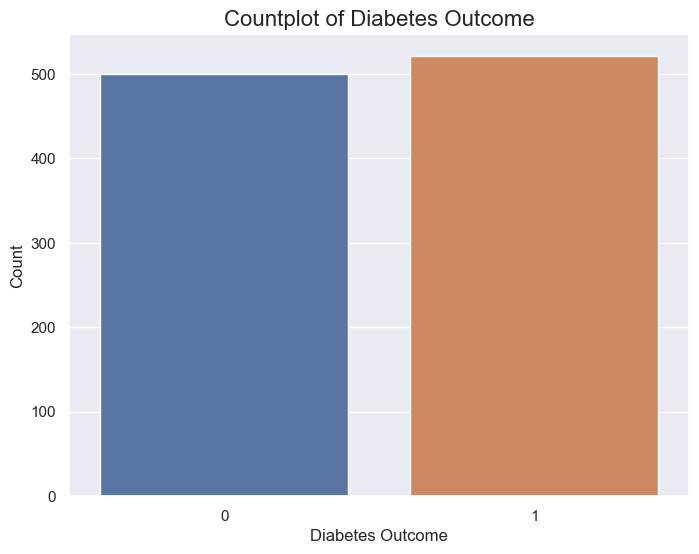

In [506]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data_balanced2)
plt.xlabel('Diabetes Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Diabetes Outcome', fontsize=16)
plt.show()

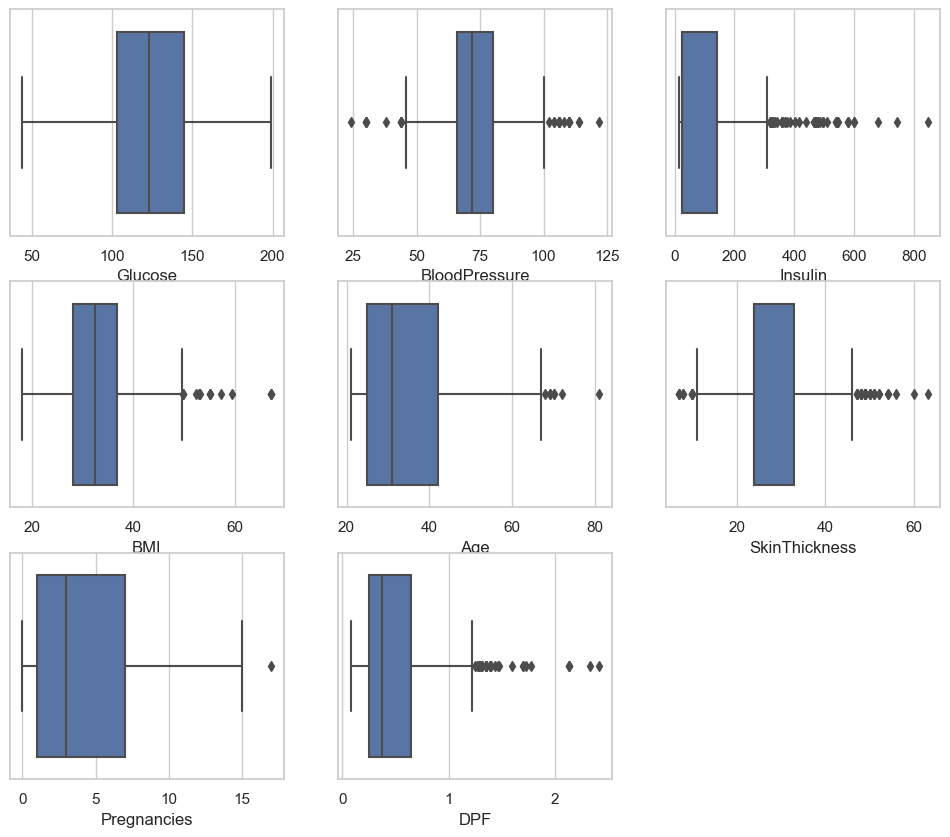

In [530]:
# Checking for outliers

plt.figure(figsize=(12,10))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data_balanced2)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data_balanced2)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data_balanced2)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data_balanced2)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data_balanced2)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data_balanced2)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data_balanced2)
plt.subplot(3,3,8)
sns.boxplot(x='DPF',data=data_balanced2)
plt.show()

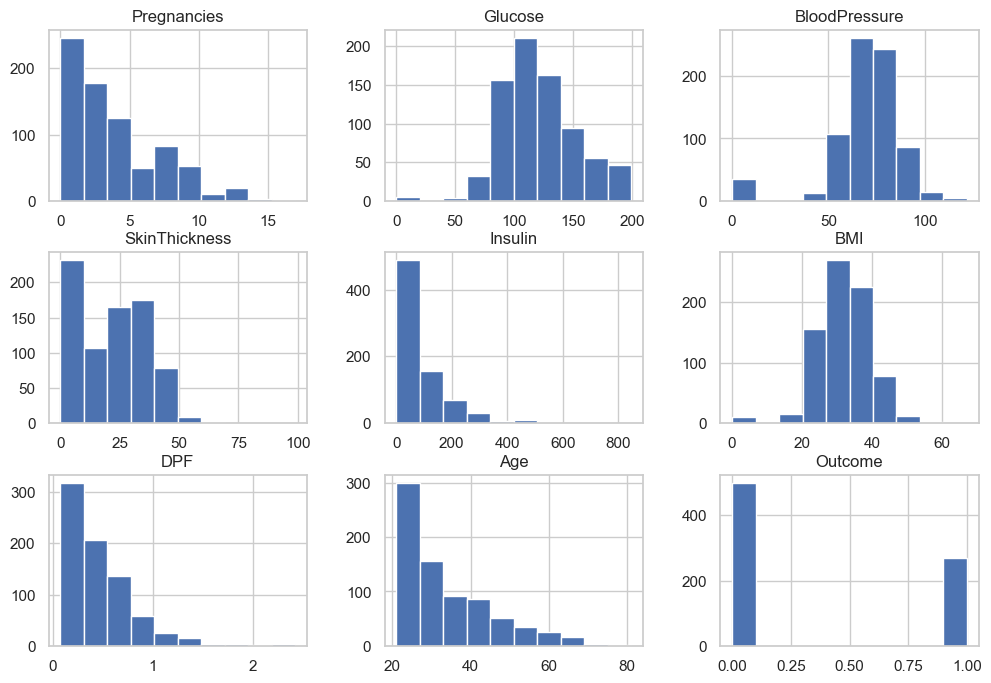

In [319]:
# Histograms
data.hist(figsize=(12,8))
plt.show()

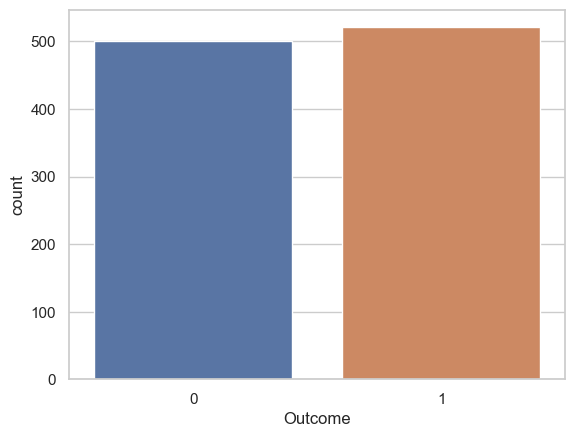

In [320]:
# Countplot
sns.countplot(x='Outcome', data=data_balanced)
plt.show()

In [527]:
data_balanced2 = data_balanced2.reset_index(drop=True)

#### Histogram helps in checking if the data is normally distributed or skewed - distribution of each variable

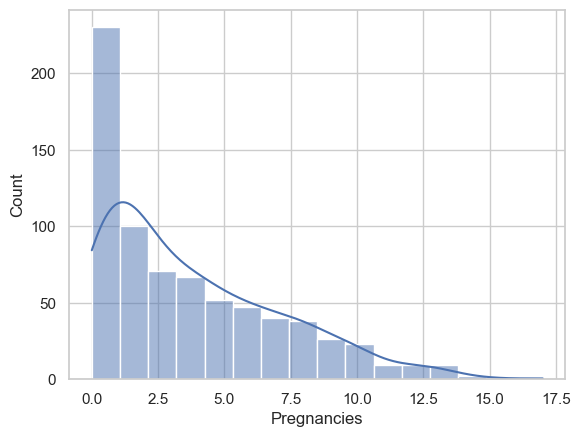

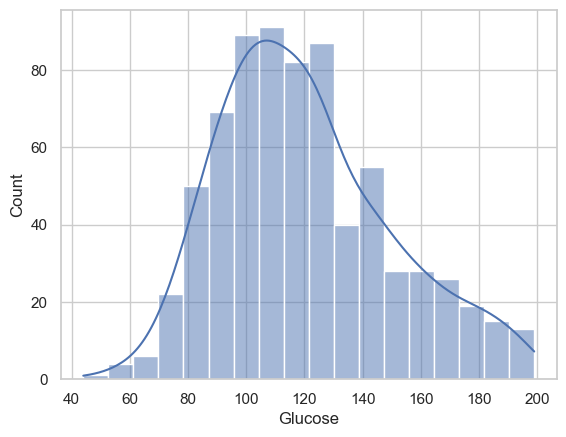

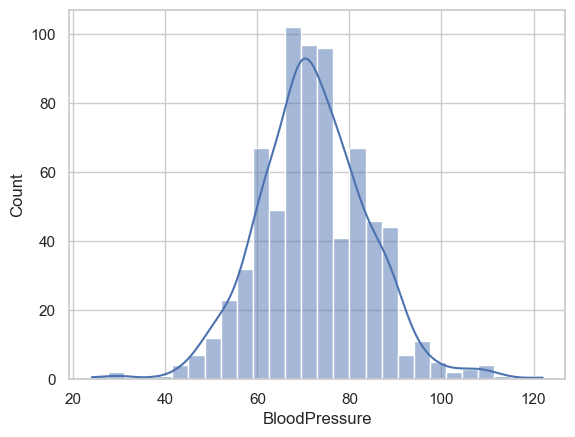

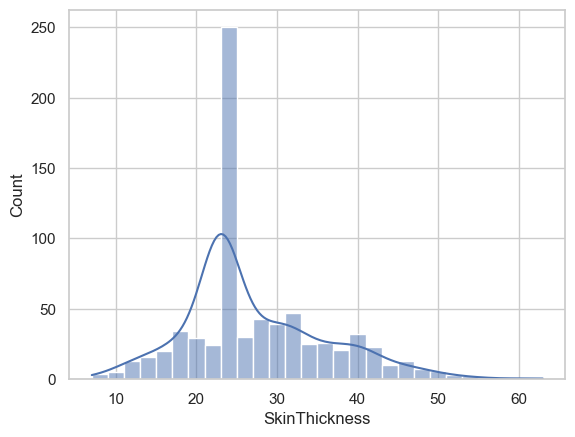

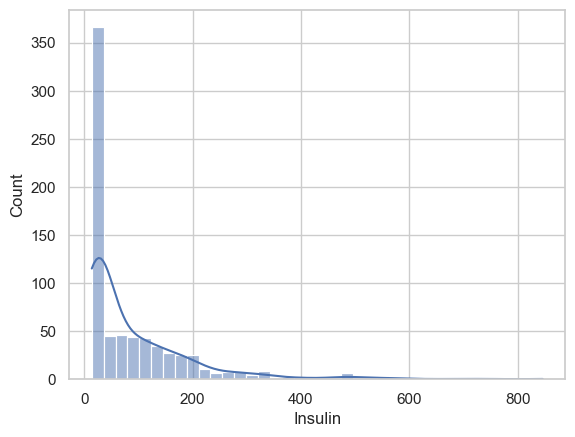

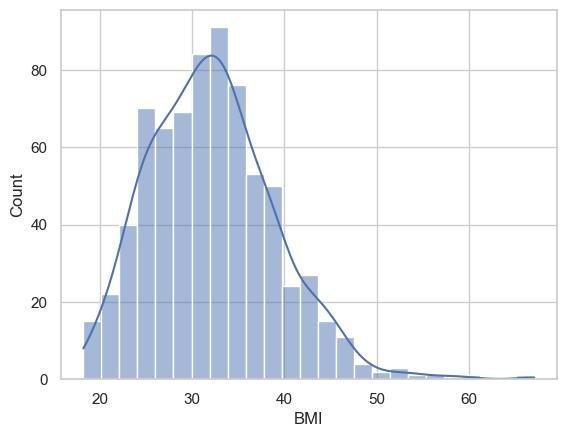

ValueError: Could not interpret value `DiabetesPedigreeFunction` for parameter `x`

In [528]:
for col in data.columns:
    sns.histplot(data=data_balanced, x=col, kde=True)
    plt.show()

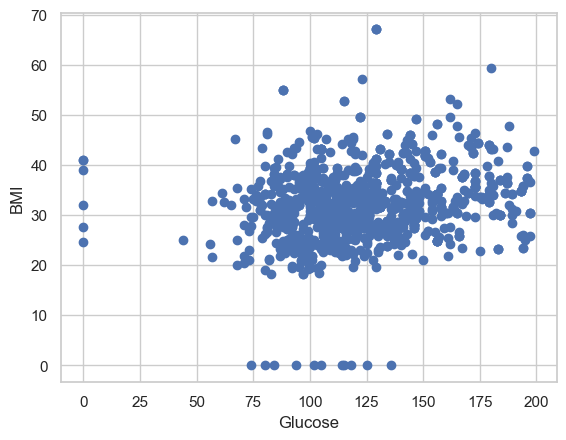

In [322]:
# Scatter Plot
plt.scatter(data_balanced['Glucose'], data_balanced2['BMI'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

#### Scatterplot is used to visualize the relationship between two numerical variables and in understanding the correlation between them

In [511]:
data_balanced2 = data_balanced2.reset_index(drop=True)


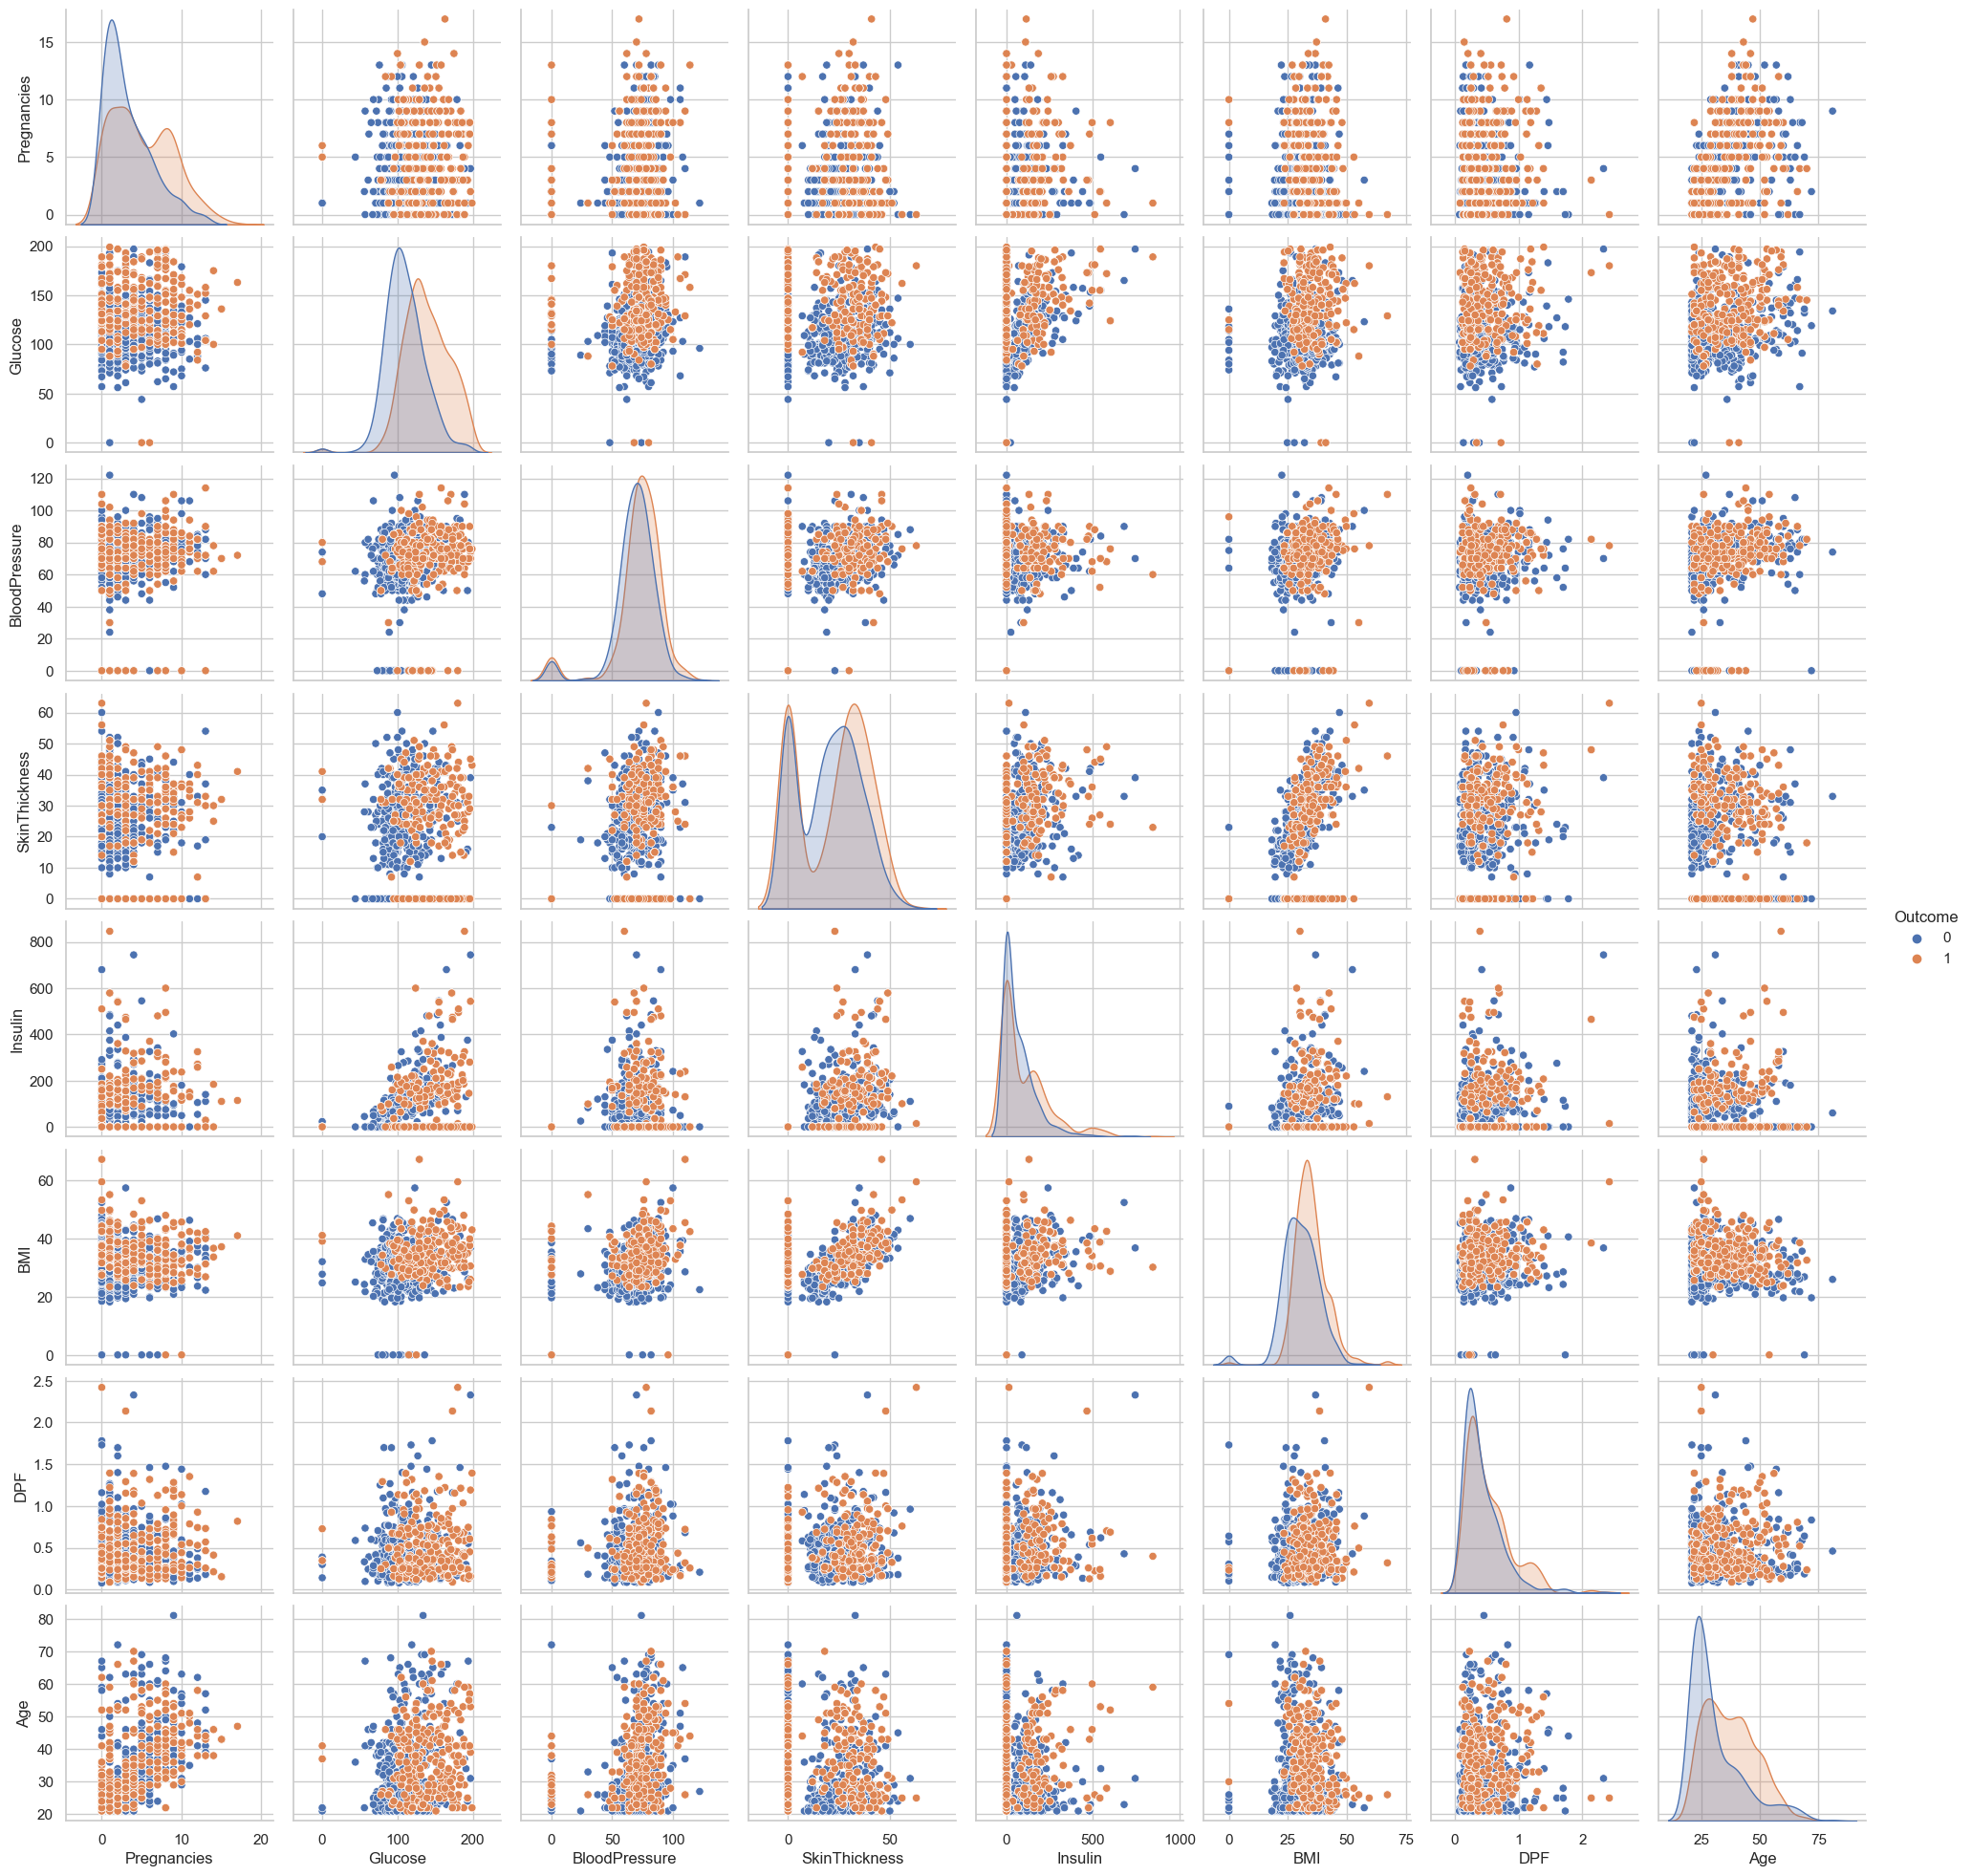

In [513]:
# Pairplot
sns.pairplot(data_balanced2, hue='Outcome')
plt.show()

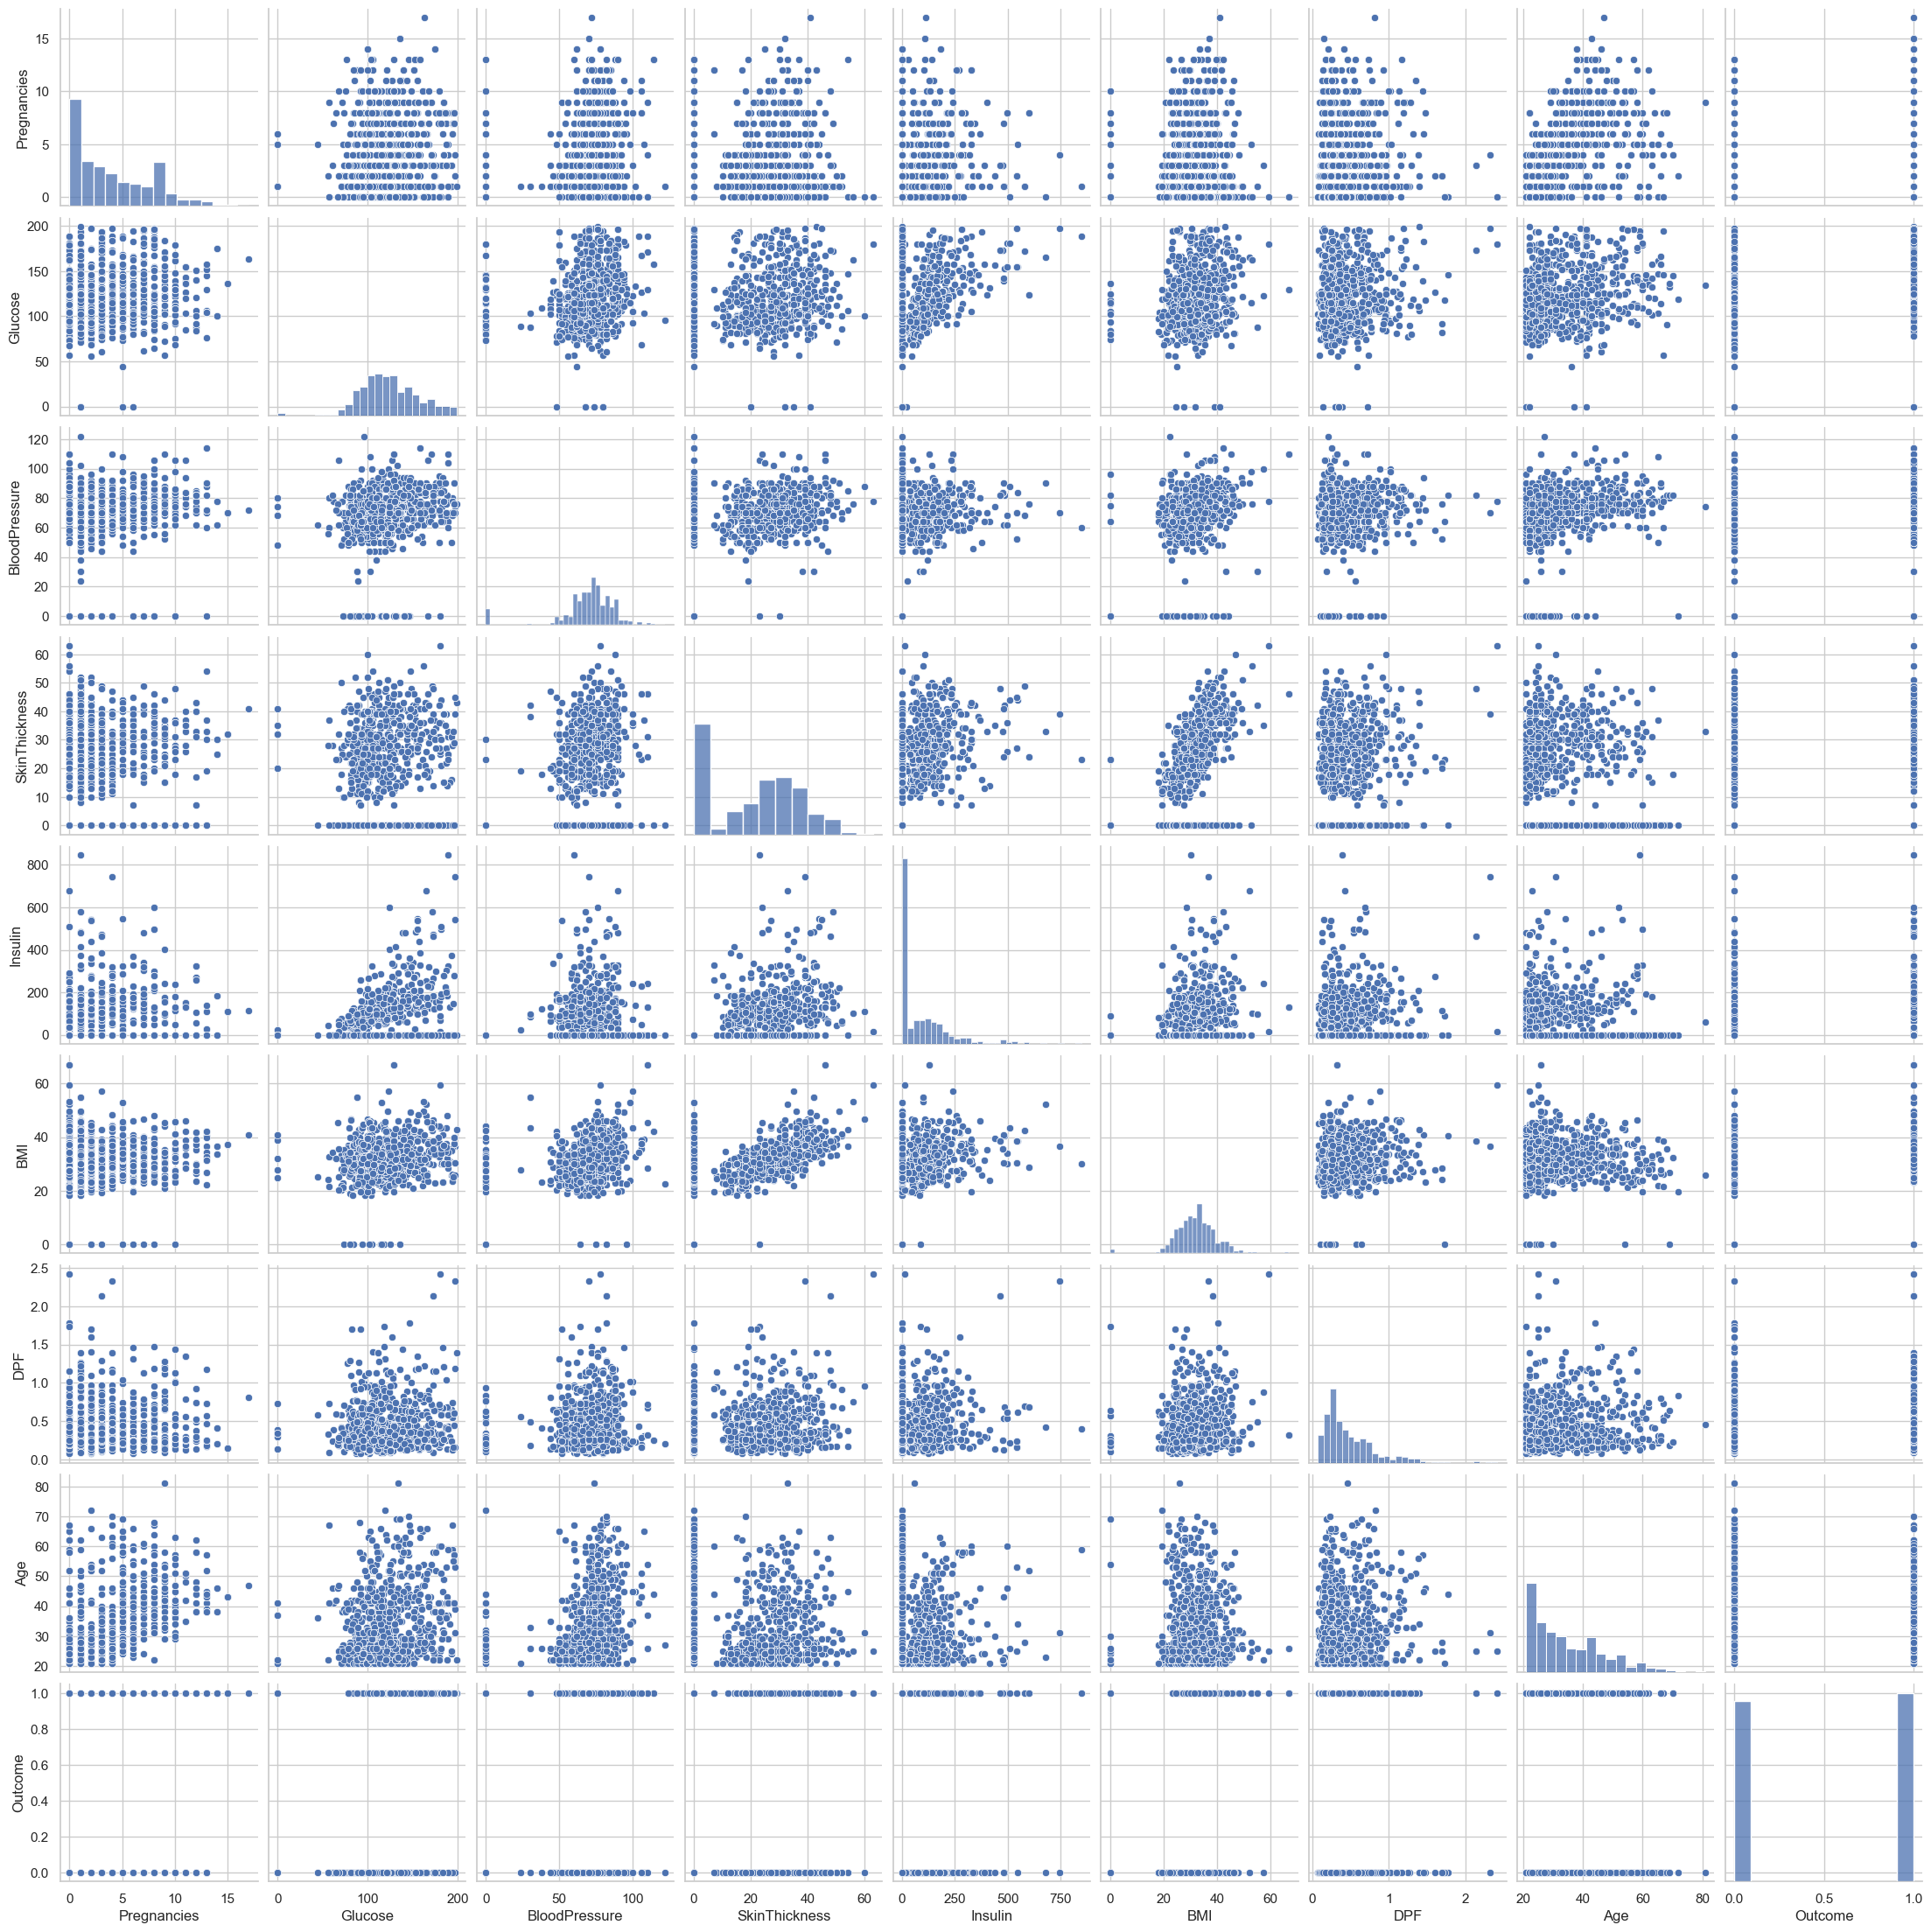

In [326]:
sns.pairplot(data_balanced)
plt.show()

#### Pair Plot is used to visualize the scatter plot between all the variables and helps in understanding their relationships

# Research Questions:
### 1.How does the distribution of age, BMI, and other demographic and clinical factors differ between individuals with and without diabetes?
### 2. Is there a correlation between the number of pregnancies and the incidence of diabetes in women?
### 3. What is the proportion of individuals with diabetes in the dataset, and is it representative of the general population?

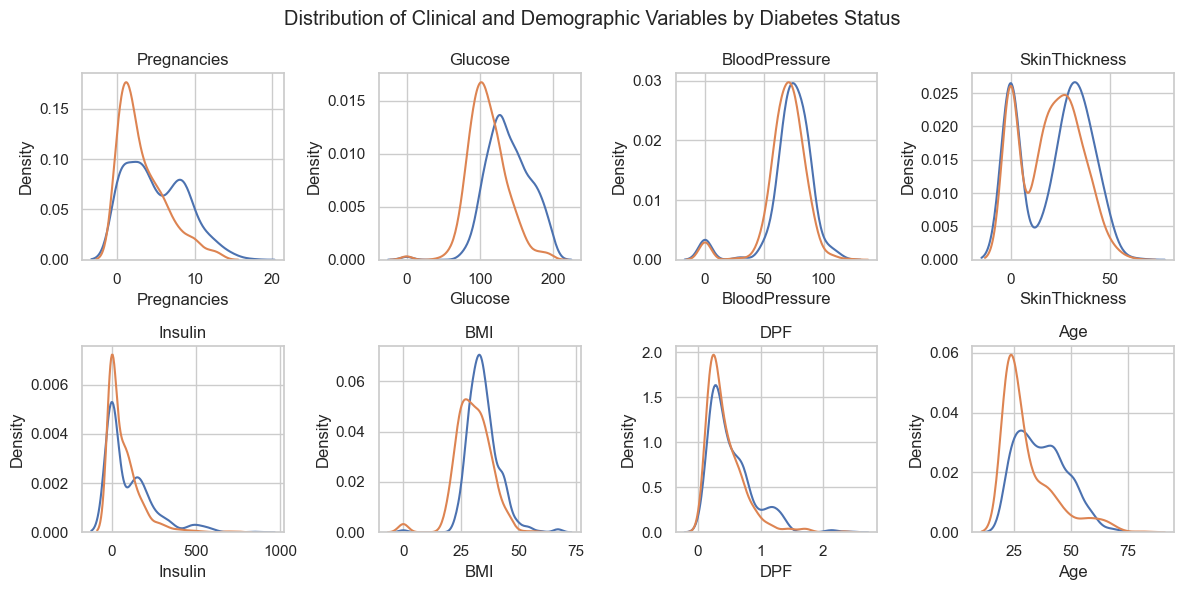

In [514]:
# 1.How does the distribution of age, BMI, and other demographic and clinical factors differ between individuals with and without diabetes?
# Subset the data for individuals with and without diabetes
with_diabetes = data_balanced2[data_balanced2['Outcome'] == 1]
without_diabetes = data_balanced2[data_balanced2['Outcome'] == 0]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

sns.kdeplot(with_diabetes['Pregnancies'], label='With Diabetes', ax=axes[0, 0])
sns.kdeplot(without_diabetes['Pregnancies'], label='Without Diabetes', ax=axes[0, 0])
sns.kdeplot(with_diabetes['Glucose'], label='With Diabetes', ax=axes[0, 1])
sns.kdeplot(without_diabetes['Glucose'], label='Without Diabetes', ax=axes[0, 1])
sns.kdeplot(with_diabetes['BloodPressure'], label='With Diabetes', ax=axes[0, 2])
sns.kdeplot(without_diabetes['BloodPressure'], label='Without Diabetes', ax=axes[0, 2])
sns.kdeplot(with_diabetes['SkinThickness'], label='With Diabetes', ax=axes[0, 3])
sns.kdeplot(without_diabetes['SkinThickness'], label='Without Diabetes', ax=axes[0, 3])
sns.kdeplot(with_diabetes['Insulin'], label='With Diabetes', ax=axes[1, 0])
sns.kdeplot(without_diabetes['Insulin'], label='Without Diabetes', ax=axes[1, 0])
sns.kdeplot(with_diabetes['BMI'], label='With Diabetes', ax=axes[1, 1])
sns.kdeplot(without_diabetes['BMI'], label='Without Diabetes', ax=axes[1, 1])
sns.kdeplot(with_diabetes['DPF'], label='With Diabetes', ax=axes[1, 2])
sns.kdeplot(without_diabetes['DPF'], label='Without Diabetes', ax=axes[1, 2])
sns.kdeplot(with_diabetes['Age'], label='With Diabetes', ax=axes[1, 3])
sns.kdeplot(without_diabetes['Age'], label='Without Diabetes', ax=axes[1, 3])

# Add titles and labels 
axes[0, 0].set(title='Pregnancies')
axes[0, 1].set(title='Glucose')
axes[0, 2].set(title='BloodPressure')
axes[0, 3].set(title='SkinThickness')
axes[1, 0].set(title='Insulin')
axes[1, 1].set(title='BMI')
axes[1, 2].set(title='DPF')
axes[1, 3].set(title='Age')

fig.suptitle('Distribution of Clinical and Demographic Variables by Diabetes Status')
plt.tight_layout()
plt.show()


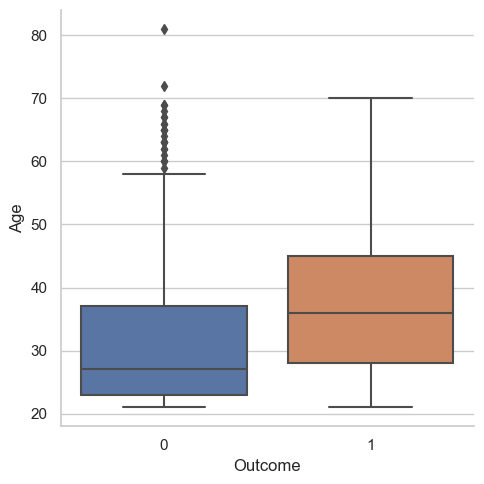

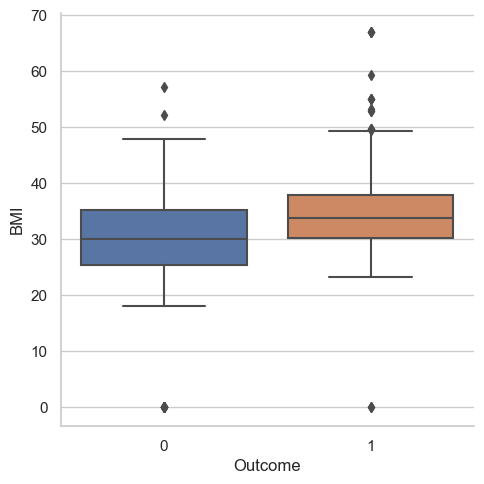

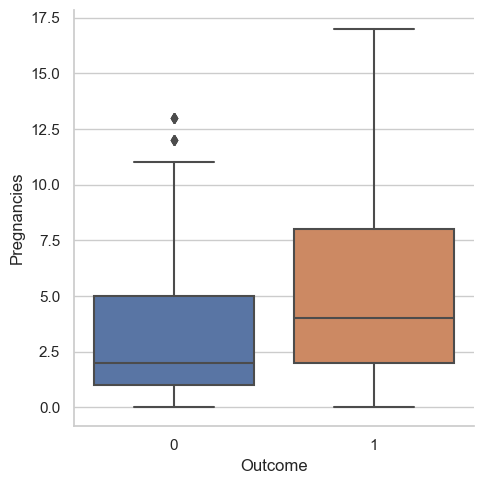

In [515]:
# 1. How does the distribution of age, BMI, and other demographic and clinical factors differ between individuals with and without diabetes?

sns.catplot(x ='Outcome', y='Age', data=data_balanced2, kind ='box')
sns.catplot(x ='Outcome', y='BMI', data=data_balanced2, kind ='box')
sns.catplot(x ='Outcome', y='Pregnancies', data=data_balanced2, kind ='box')
plt.show()

## Correlation Analysis

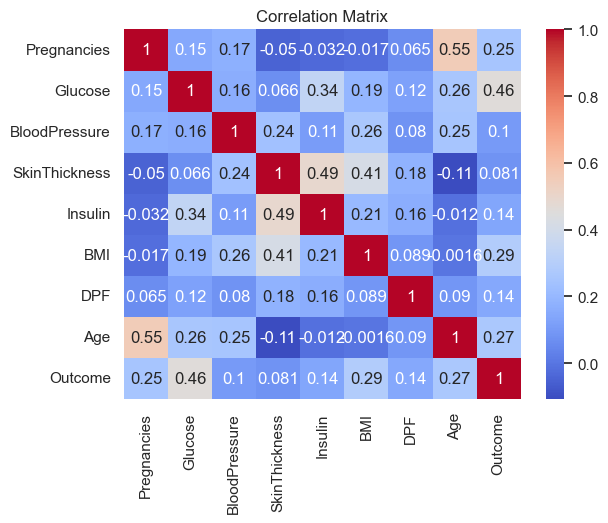

In [516]:
sns.heatmap(data_balanced2.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


#### We can observe that Glucose, BMI and Age are the most correlated with Outcome
#### BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated


In [158]:
#Dropped columns that don't correlate with Outcome
data_selected=data.drop(['BloodPressure','Insulin','DPF'],axis='columns')

In [159]:
from sklearn.preprocessing import QuantileTransformer
x=data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()

Pregnancies   Glucose  SkinThickness       BMI       Age  Outcome
0     0.747718  0.810300       0.801825  0.591265  0.889831      1.0
1     0.232725  0.091265       0.644720  0.213168  0.558670      0.0
2     0.863755  0.956975       0.357888  0.077575  0.585398      1.0
3     0.232725  0.124511       0.357888  0.284224  0.000000      0.0
4     0.000000  0.721643       0.801825  0.926988  0.606258      1.0

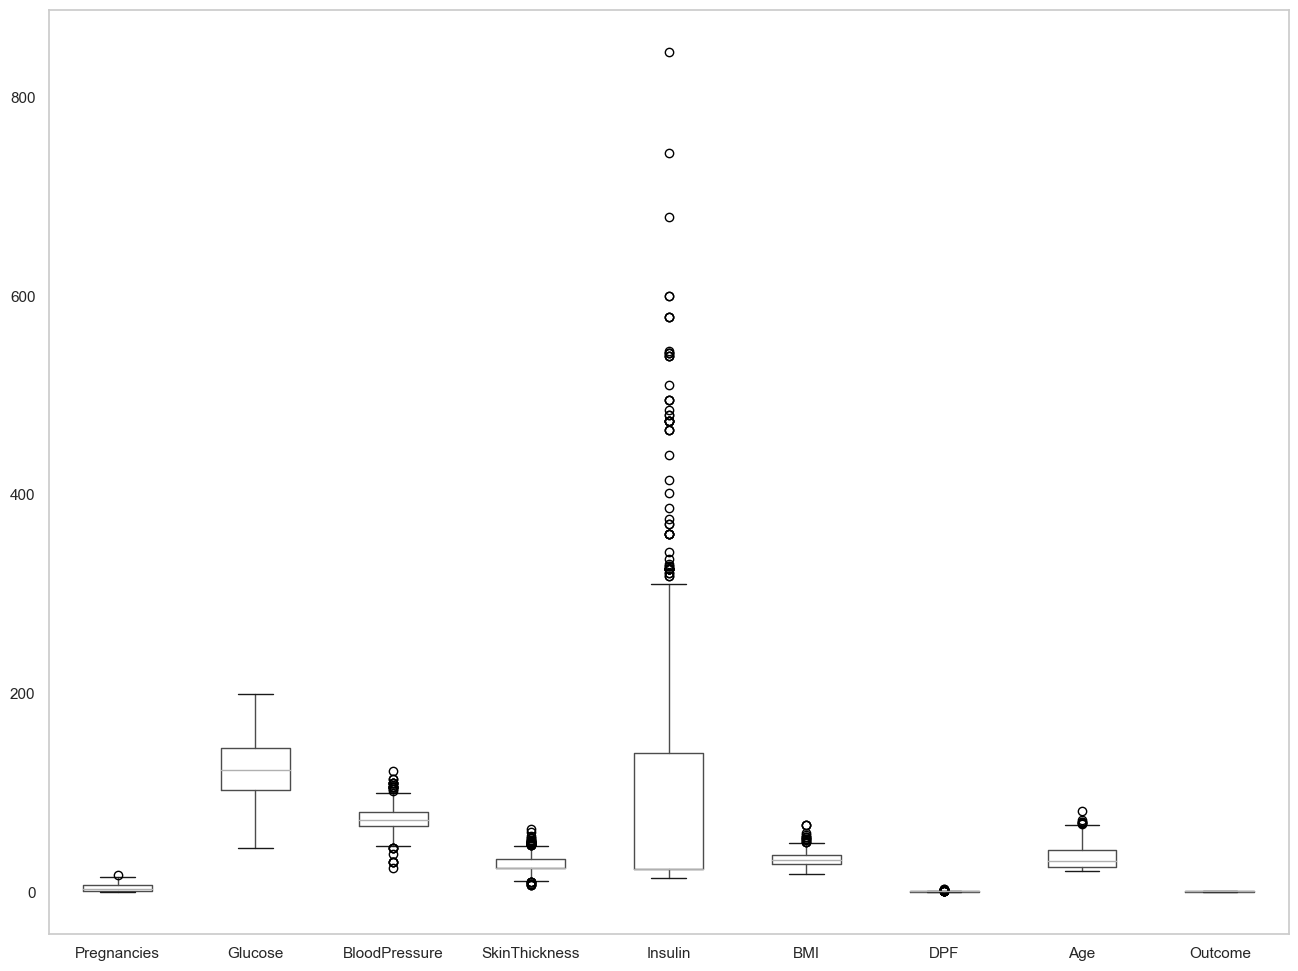

In [529]:
# Boxplot
data_balanced2.boxplot(figsize=(16,12), grid=False)
plt.show()

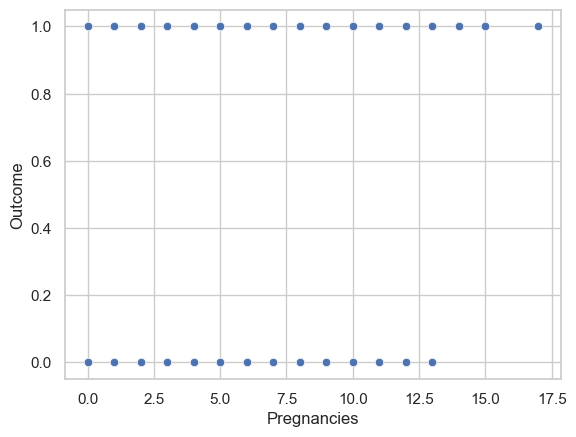

Correlation Coefficient: 0.25197311052346455


In [524]:
# 2.Is there a correlation between the number of pregnancies and the incidence of diabetes in women?

sns.scatterplot(x='Pregnancies', y='Outcome', data=data_balanced2)
plt.show()
corr_co = data_balanced2['Pregnancies'].corr(data_balanced2['Outcome'])
print(f'Correlation Coefficient: {corr_co}')

In [162]:
from scipy.stats import pearsonr

corr, pval = pearsonr(data['Pregnancies'], data['Outcome'])

print("Correlation Coefficient:", corr)
print("p-value:", pval)


Correlation Coefficient: 0.22189815303398677
p-value: 5.065127298051538e-10


#### The scatter plot shows the relationship between the number of pregnancies and the incidence of diabetes in women.
#### The correlation coefficient indicates a weak positive correlation between two variables, meaning that as one variable increases, the other variable tends to increase as well, but not strongly.
####  There is a statistically significant difference between the two groups being compared.


## Hypothesis
#### The prevalence of diabetes is higher in individuals who have a higher BMI and are older in age. Additionally, there is a weak correlation between the number of pregnancies and the incidence of diabetes in women.

In [518]:
# 3. What is the proportion of individuals with diabetes in the dataset, and is it representative of the general population?

proportion_diabetes = data_balanced2['Outcome'].sum()/len(data_balanced2)

print('Proportion of individuals with diabetes in the dataset: ',proportion_diabetes)

Proportion of individuals with diabetes in the dataset:  0.5102840352595495


#### The proportion of individuals with diabetes in the dataset is 0.5103, which means that around 51% of the individuals in the dataset have diabetes. This proportion is higher than the diabetes prevalence in Kenya, which is 3.3% according to the 2015 STEPwise survey for noncommunicable diseases. However, the WHO data indicates that diabetes prevalence has been rising more rapidly in middle- and low-income countries, including Kenya, which suggests that the dataset may not be representative of the general population in terms of diabetes prevalence..

#### Kernel Density Estimation estimates the probability density function of a continuous random variable

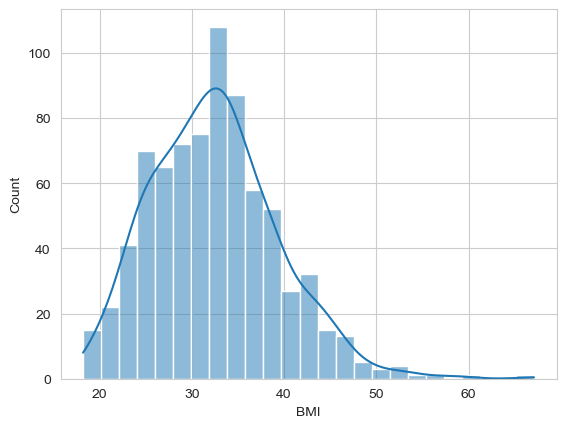

In [164]:
sns.histplot(data=data, x='BMI', kde=True)
plt.show()

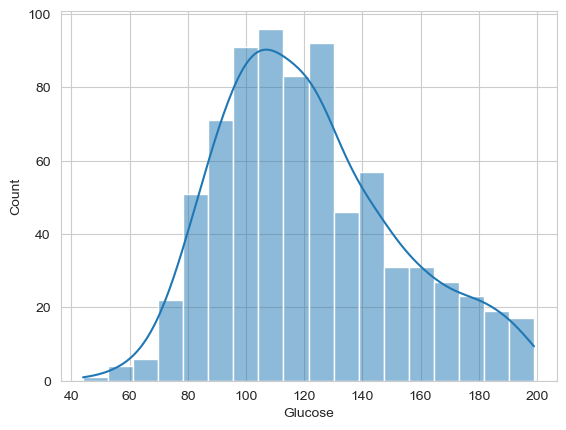

In [165]:
sns.histplot(data=data, x='Glucose', kde=True)
plt.show()

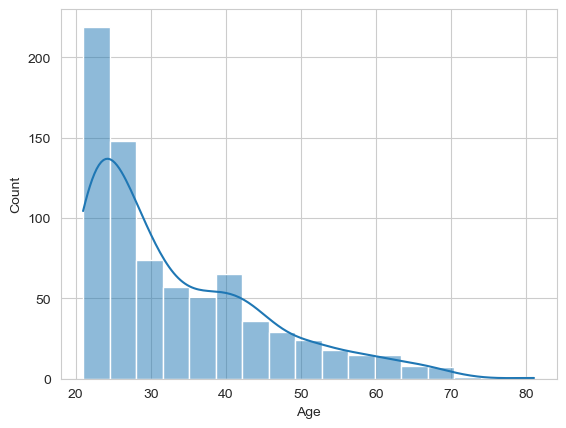

In [166]:
sns.histplot(data=data, x='Age', kde=True)
plt.show()

In [167]:
data.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0           72.0             35     30.5  33.6  0.627   
1            1     85.0           66.0             29     30.5  26.6  0.351   

   Age  Outcome  
0   50        1  
1   31        0

## Univariate Analysis

In [519]:
data_balanced2.groupby('Outcome')['Pregnancies'].agg(['mean','min','max'])

mean  min  max
Outcome                    
0        3.298000    0   13
1        5.092131    0   17

#### On average, individuals with outcome 1(diabetes positive) have a slightly higher number of pregnancies compared to those with outcome 0(diabetes negative)
#### The minimum value of 0 indicates there are individuals in the dataset who have nevr been pregnant while the maximum value of 13 indicates the highest number of pregnancies reported in the dataset

In [169]:
data.groupby('Outcome')['BloodPressure'].agg(['mean','min','max'])

mean   min    max
Outcome                        
0        70.810008  24.0  122.0
1        74.950326  30.0  114.0

In [170]:
data.groupby('Outcome')['SkinThickness'].agg(['mean','min','max'])

mean  min  max
Outcome                     
0        26.058000    7   60
1        29.716418    7   99

In [86]:
data.groupby('Outcome')['Insulin'].agg(['mean','min','max'])

mean   min    max
Outcome                         
0         83.188000  15.0  744.0
1        116.041045  14.0  846.0

In [87]:
data.groupby('Outcome')['BMI'].agg(['mean','min','max'])

mean   min   max
Outcome                       
0        30.880200  18.2  57.3
1        35.381343  22.9  67.1

In [70]:
data.groupby('Outcome')['DPF'].agg(['mean','min','max'])

mean    min    max
Outcome                        
0        0.380117  0.078  1.095
1        0.461127  0.088  1.057

In [89]:
data.groupby('Outcome')['Age'].agg(['mean','min','max'])

mean  min  max
Outcome                     
0        31.190000   21   81
1        37.067164   21   70

## Bivariate Analysis

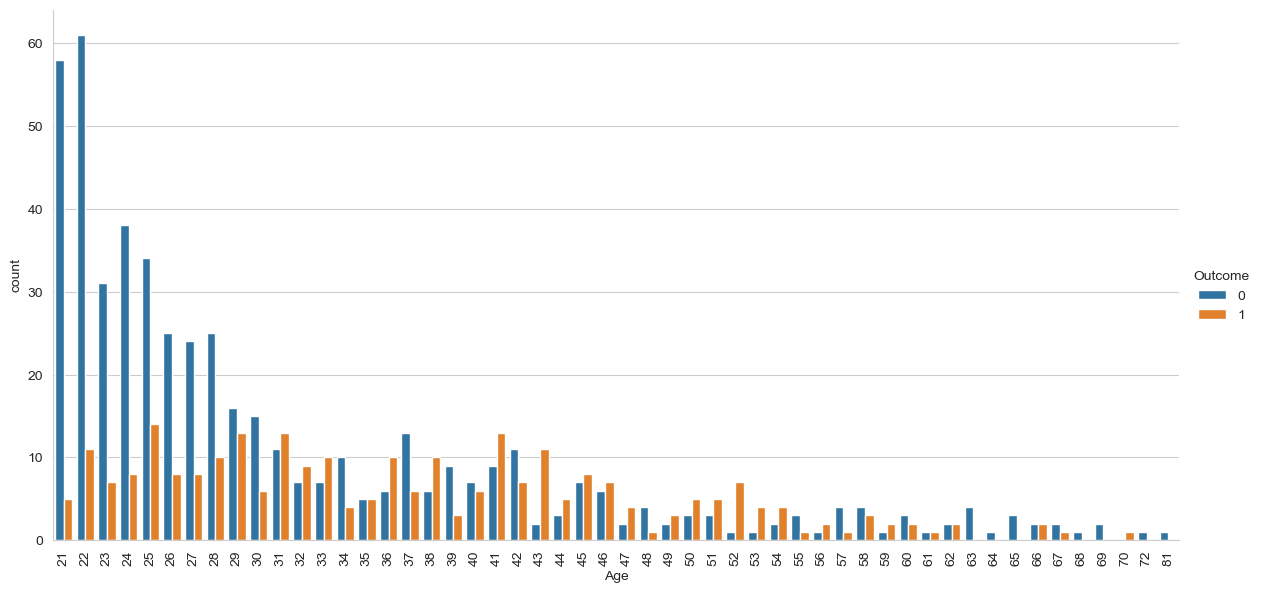

In [210]:

g = sns.catplot(x="Age", hue="Outcome", data=data, kind="count", height=6, aspect=2)
g.set_xticklabels(rotation=90)

sns.despine()
plt.show()


In [27]:
data['Age'].describe()

count    604.000000
mean      32.124172
std       10.602081
min       21.000000
25%       24.000000
50%       28.000000
75%       39.000000
max       64.000000
Name: Age, dtype: float64

x-axis represents the age of the individuals in the dataset, while y-axis shows the number of people in each age group
The plot is divided into two sections, one colored in blue and one in orange. The blue section represents people who do not have diabetes, while the orange section represents people who do have diabetes.
The youngest person in the dataset is 21 years old while the oldest is 64 years old.

In [29]:
data['Glucose'].describe()

count    604.000000
mean     117.236755
std       27.696745
min       44.000000
25%       98.000000
50%      112.000000
75%      133.000000
max      194.000000
Name: Glucose, dtype: float64

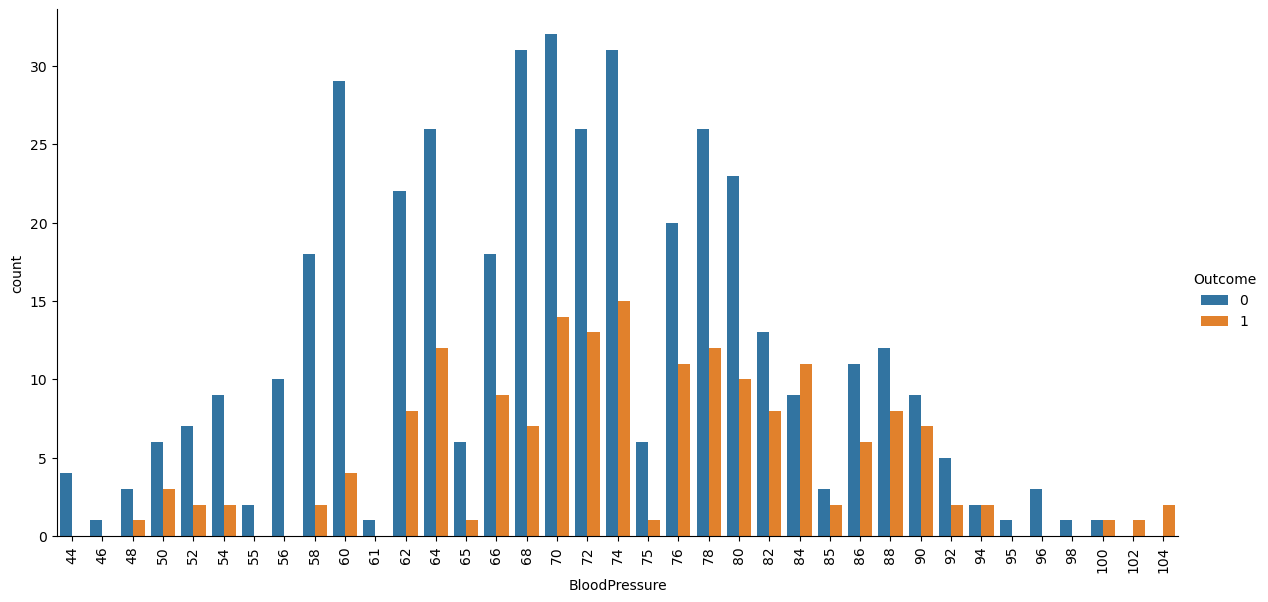

In [30]:
g = sns.catplot(x="BloodPressure", hue="Outcome", data=data, kind="count", height=6, aspect=2)
g.set_xticklabels(rotation=90)
sns.despine()
plt.show()


In [31]:
data['BloodPressure'].describe()

count    604.000000
mean      71.733444
std       10.997669
min       44.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      104.000000
Name: BloodPressure, dtype: float64

In [32]:
data['BMI'].describe()

count    604.000000
mean      31.787748
std        6.278275
min       18.200000
25%       27.200000
50%       31.950000
75%       35.800000
max       48.300000
Name: BMI, dtype: float64

In [71]:
data['DPF'].describe()

count    568.000000
mean       0.403650
std        0.225172
min        0.078000
25%        0.234750
50%        0.339000
75%        0.551750
max        1.095000
Name: DPF, dtype: float64

In [188]:
# 3.What is the proportion of individuals with diabetes in the dataset, and is it representative of the general population?
# Calculate the proportion of individuals with diabetes
num_diabetes = len(data[data['Outcome'] == 1])
num_total = len(data)
prop_diabetes = num_diabetes / num_total

print('Proportion of individuals with diabetes in the dataset:', prop_diabetes)


Proportion of individuals with diabetes in the dataset: 0.3489583333333333


In [189]:

diabetes_proportion = (data['Outcome'] == 1).mean() * 100

print('Proportion of individuals with diabetes in the dataset: {:.2f}%'.format(diabetes_proportion))


Proportion of individuals with diabetes in the dataset: 34.90%


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training set
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7727272727272727
